<a href="https://colab.research.google.com/github/mradi004/data_science_revision/blob/main/probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import random

In [3]:
l=[]
for i in range(1000):
  a=random.randint(1,6)
  b=random.randint(1,6)

  l.append(a+b)

In [4]:
l[:5]

[10, 7, 8, 4, 11]

In [5]:
s=pd.Series(l)

In [6]:
s.value_counts()

,count
7,198
8,156
6,133
9,113
5,87
10,81
4,74
3,47
11,43
2,38


In [7]:
s2=(s.value_counts()/s.value_counts().sum()).sort_index()

In [8]:
s2

,count
2,0.038
3,0.047
4,0.074
5,0.087
6,0.133
7,0.198
8,0.156
9,0.113
10,0.081
11,0.043


<Axes: >

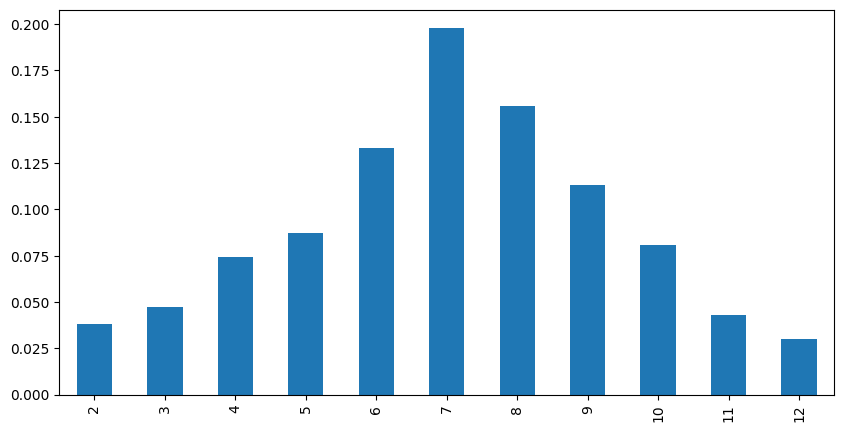

In [9]:
s2.plot(kind='bar',figsize=(10,5))

In [10]:
import numpy as np
np.cumsum(s2)

,count
2,0.038
3,0.085
4,0.159
5,0.246
6,0.379
7,0.577
8,0.733
9,0.846
10,0.927
11,0.970


<Axes: >

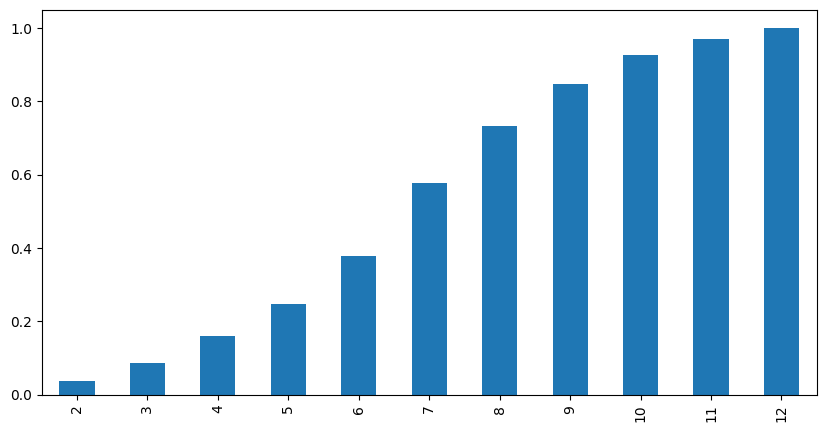

In [11]:
s2.cumsum().plot(kind='bar',figsize=(10,5))

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm

sample=normal(loc=50,scale=10,size=1000)

(array([0.00013143, 0.00092002, 0.0036801 , 0.01577186, 0.03128085,
        0.03956107, 0.02930936, 0.00814879, 0.00249721, 0.00013143]),
 array([ 9.79479307, 17.40328292, 25.01177277, 32.62026262, 40.22875247,
        47.83724232, 55.44573217, 63.05422202, 70.66271187, 78.27120172,
        85.87969157]),
 <BarContainer object of 10 artists>)

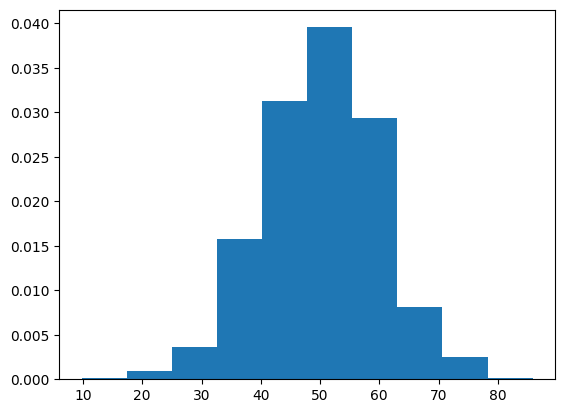

In [14]:
plt.hist(sample,density=True)

In [16]:
sample_mean=sample.mean()
sample_std=sample.std()

In [32]:
dist=norm(sample_mean,sample_std)

In [33]:
values=np.linspace(sample.min(),sample.max(),100)

In [34]:
probability=[norm.pdf(value, loc=sample_mean, scale=sample_std) for value in values]

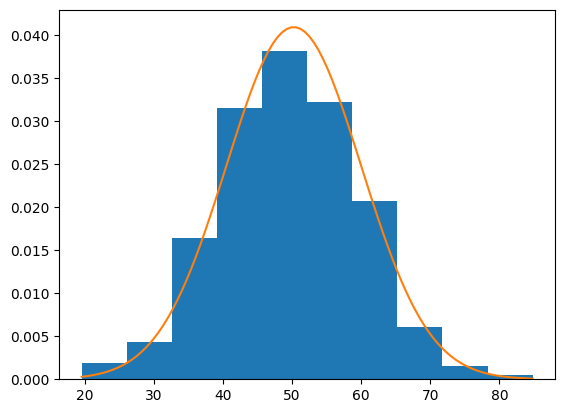

In [36]:
plt.hist(sample,density=True)
plt.plot(values,probability)

In [ ]:
#kde distribution

In [38]:
sample1=normal(loc=20,scale=5,size=300)
sample2=normal(loc=40,scale=5,size=700)

In [39]:
sample3=np.hstack((sample1,sample2))

(array([ 2.,  1.,  0.,  0.,  2.,  3.,  3.,  3.,  4.,  8., 17., 20., 18.,
        24., 26., 31., 27., 18., 23., 15., 19.,  9., 11.,  8.,  9., 13.,
        17., 16., 22., 28., 33., 38., 50., 58., 56., 65., 55., 58., 42.,
        38., 34., 26., 13., 16.,  8.,  3.,  4.,  3.,  2.,  1.]),
 array([ 3.26694567,  4.31801155,  5.36907742,  6.4201433 ,  7.47120918,
         8.52227506,  9.57334093, 10.62440681, 11.67547269, 12.72653857,
        13.77760444, 14.82867032, 15.8797362 , 16.93080208, 17.98186795,
        19.03293383, 20.08399971, 21.13506559, 22.18613146, 23.23719734,
        24.28826322, 25.3393291 , 26.39039497, 27.44146085, 28.49252673,
        29.54359261, 30.59465848, 31.64572436, 32.69679024, 33.74785612,
        34.79892199, 35.84998787, 36.90105375, 37.95211963, 39.0031855 ,
        40.05425138, 41.10531726, 42.15638314, 43.20744901, 44.25851489,
        45.30958077, 46.36064665, 47.41171252, 48.4627784 , 49.51384428,
        50.56491016, 51.61597603, 52.66704191, 53.71810779,

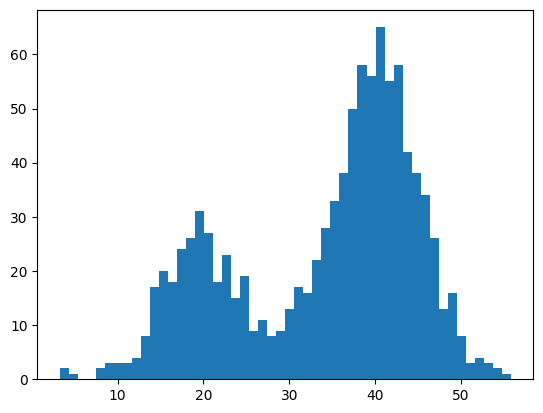

In [42]:
plt.hist(sample3,bins=50)

<Axes: ylabel='Density'>

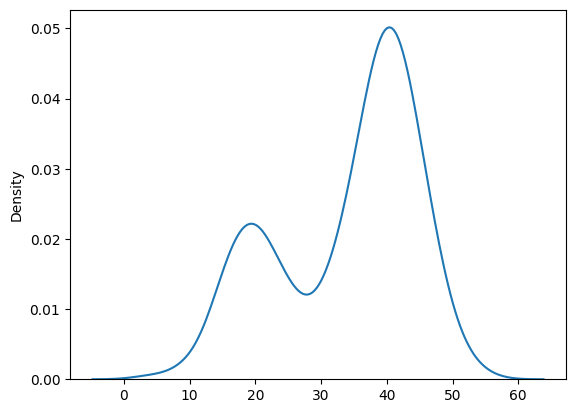

In [43]:
import seaborn as sns
sns.kdeplot(sample3)

In [44]:
from sklearn.neighbors import KernelDensity
model=KernelDensity(bandwidth=3,kernel='gaussian')

sample3=sample3.reshape(len(sample3),1)
model.fit(sample3)

KernelDensity(bandwidth=3)

In [45]:
values=np.linspace(sample3.min(),sample3.max(),100)
values=values.reshape(len(values),1)

In [46]:
probabilities=model.score_samples(values)
probabilities=np.exp(probabilities)

In [49]:
probabilities

array([0.00056999, 0.00065743, 0.00075609, 0.00087004, 0.00100445,
       0.00116549, 0.0013602 , 0.00159647, 0.00188306, 0.00222955,
       0.00264637, 0.00314447, 0.00373479, 0.00442734, 0.00522992,
       0.00614672, 0.00717687, 0.00831338, 0.00954255, 0.01084409,
       0.01219187, 0.01355536, 0.0149013 , 0.01619559, 0.01740499,
       0.01849866, 0.01944929, 0.02023406, 0.02083537, 0.0212415 ,
       0.02144707, 0.02145339, 0.02126858, 0.02090728, 0.02038997,
       0.01974204, 0.01899249, 0.01817262, 0.01731484, 0.01645164,
       0.01561488, 0.01483532, 0.0141423 , 0.01356336, 0.01312392,
       0.01284671, 0.01275118, 0.01285299, 0.0131636 , 0.01369014,
       0.01443563, 0.01539941, 0.01657769, 0.01796404, 0.01954965,
       0.02132321, 0.02327039, 0.02537303, 0.02760801, 0.02994622,
       0.03235175, 0.03478145, 0.03718526, 0.0395072 , 0.04168715,
       0.04366338, 0.04537549, 0.04676765, 0.04779182, 0.04841053,
       0.0485992 , 0.04834751, 0.04765995, 0.0465554 , 0.04506

In [51]:
cdf=np.cumsum(probabilities)
cdf=cdf/cdf[-1]

In [52]:
cdf

array([3.03670222e-04, 6.53920778e-04, 1.05673366e-03, 1.52025641e-03,
       2.05538916e-03, 2.67631472e-03, 3.40097404e-03, 4.25151333e-03,
       5.25473415e-03, 6.44255419e-03, 7.85243728e-03, 9.52768642e-03,
       1.15174357e-02, 1.38761482e-02, 1.66624466e-02, 1.99371784e-02,
       2.37607341e-02, 2.81897792e-02, 3.32736808e-02, 3.90509901e-02,
       4.55463470e-02, 5.27681172e-02, 6.07069518e-02, 6.93353317e-02,
       7.86080371e-02, 8.84634075e-02, 9.88252358e-02, 1.09605158e-01,
       1.20705437e-01, 1.32022086e-01, 1.43448252e-01, 1.54877786e-01,
       1.66208863e-01, 1.77347449e-01, 1.88210434e-01, 1.98728227e-01,
       2.08846688e-01, 2.18528355e-01, 2.27753029e-01, 2.36517823e-01,
       2.44836824e-01, 2.52740509e-01, 2.60274977e-01, 2.67501011e-01,
       2.74492928e-01, 2.81337156e-01, 2.88130491e-01, 2.94978067e-01,
       3.01991121e-01, 3.09284694e-01, 3.16975436e-01, 3.25179644e-01,
       3.34011595e-01, 3.43582141e-01, 3.53997437e-01, 3.65357615e-01,
      

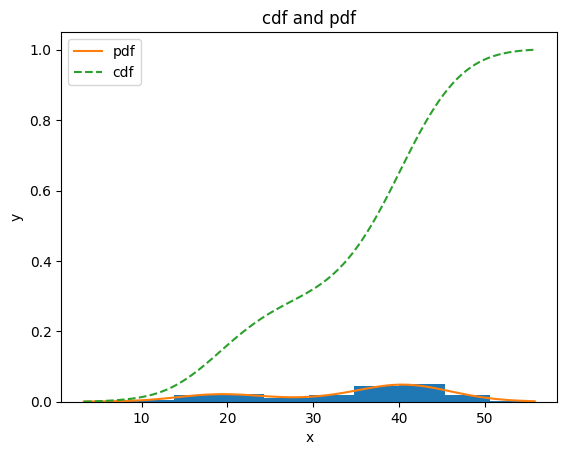

In [56]:
plt.hist(sample3,density=True)
plt.plot(values,probabilities,label='pdf')
plt.plot(values,cdf,label='cdf',linestyle='--')
plt.title('cdf and pdf')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

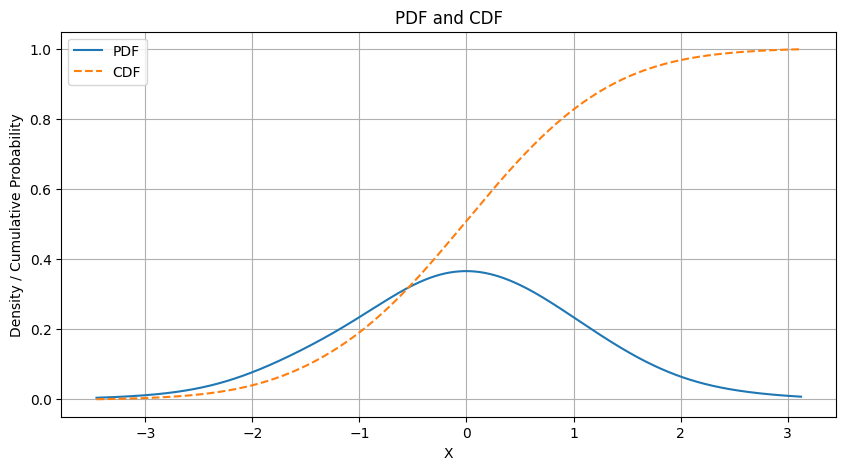

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Step 1: Sample data
data = np.random.normal(loc=0, scale=1, size=1000).reshape(-1, 1)

# Step 2: Fit KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(data)

# Step 3: Create a range of values
x_vals = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)

# Step 4: Get log density and convert to probability density
log_dens = kde.score_samples(x_vals)
pdf = np.exp(log_dens)

# Step 5: Compute CDF by cumulative sum (numerical integration)
cdf = np.cumsum(pdf)
cdf = cdf / cdf[-1]  # Normalize to make final value = 1

# Step 6: Plot both PDF and CDF
plt.figure(figsize=(10, 5))
plt.plot(x_vals, pdf, label="PDF")
plt.plot(x_vals, cdf, label="CDF", linestyle='--')
plt.title("PDF and CDF")
plt.xlabel("X")
plt.ylabel("Density / Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()
